* Import your data into a Pandas DataFrame.
* Merge your DataFrames.
* Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for each city type, including * * urban, suburban, and rural.
* Determine the mean, median, and mode for the following:
    * The total number of rides for each city type.
    * The average fares for each city type.
    * The total number of drivers for each city type.
* Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:
    * The number of rides for each city type.
    * The fares for each city type.
    * The number of drivers for each city type.
* Create a pie chart that visualizes each of the following data for each city type:
    * The percent of total fares.
    * The percent of total rides.
    * The percent of total drivers.

In [4]:
# Add magic statements for whole notebook
# Include this line to make plots interactive
%matplotlib notebook

# Make plots display in-line
%matplotlib inline

In [5]:
# Add Python Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [6]:
# Import data files
city_data_csv = "Resources/city_data.csv"
ride_data_csv = "Resources/ride_data.csv"

In [7]:
# Convert city csv to DataFrame
city_data_df = pd.read_csv(city_data_csv)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [8]:
# Convert ride csv to DataFrame
ride_data_df = pd.read_csv(ride_data_csv)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


## Exploratory Data Analysis

In [9]:
# Count for City Data
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [10]:
# Look for nulls in City Data
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [11]:
# Check data types in CIty Data
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [12]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [13]:
for types in city_data_df["type"].unique():
    print(types, sum(city_data_df["type"]==types))

Urban 66
Suburban 36
Rural 18


In [14]:
# Count for Ride Data
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [15]:
# Look for nulls in Ride Data
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [16]:
# Check data types in Ride Data
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [17]:
# Merge the city and ride dataframes
city_ride_merged_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

city_ride_merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [18]:
# Create dataframes for each type of city
urban_cities_df = city_ride_merged_df[city_ride_merged_df["type"] == "Urban"]
suburban_cities_df = city_ride_merged_df[city_ride_merged_df["type"] == "Suburban"]
rural_cities_df = city_ride_merged_df[city_ride_merged_df["type"] == "Rural"]

# urban_cities_df.head()

In [19]:
# Get average fares for each type of city
avg_urban_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
avg_suburban_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
avg_rural_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

# avg_urban_fare.head()

In [20]:
# Find number of drivers in each area
count_urban_drivers = urban_cities_df.groupby(["city"]).mean()["driver_count"]
count_suburban_drivers = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
count_rural_drivers = rural_cities_df.groupby(["city"]).mean()["driver_count"]

#count_urban_drivers.head()

In [21]:
# Find total numbers of trips in each area
count_urban_rides = urban_cities_df.groupby(["city"]).count()["ride_id"]
count_suburban_rides = suburban_cities_df.groupby(["city"]).count()["ride_id"]
count_rural_rides = rural_cities_df.groupby(["city"]).count()["ride_id"]

# count_urban_rides.head()

Wall time: 122 ms


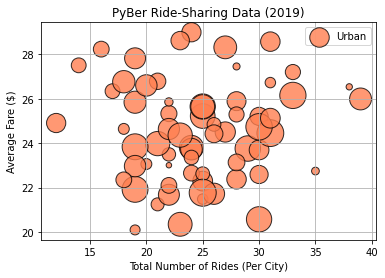

In [22]:
%%time
plt.scatter(count_urban_rides, avg_urban_fare, s=10*count_urban_drivers, c="coral", edgecolor="black", linewidths=1, alpha=0.8, label="Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

Wall time: 69 ms


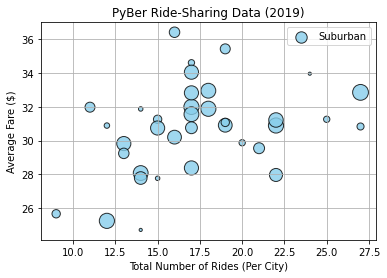

In [23]:
%%time
plt.scatter(count_suburban_rides, avg_suburban_fare, s=10*count_suburban_drivers, c="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

Wall time: 64.5 ms


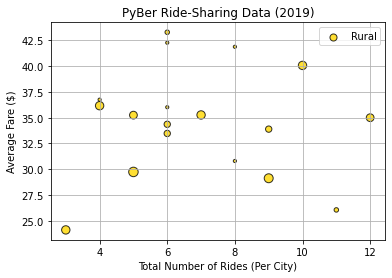

In [24]:
%%time
plt.scatter(count_rural_rides, avg_rural_fare, s=10*count_rural_drivers, c="gold", edgecolor="black", linewidths=1, alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

Wall time: 339 ms


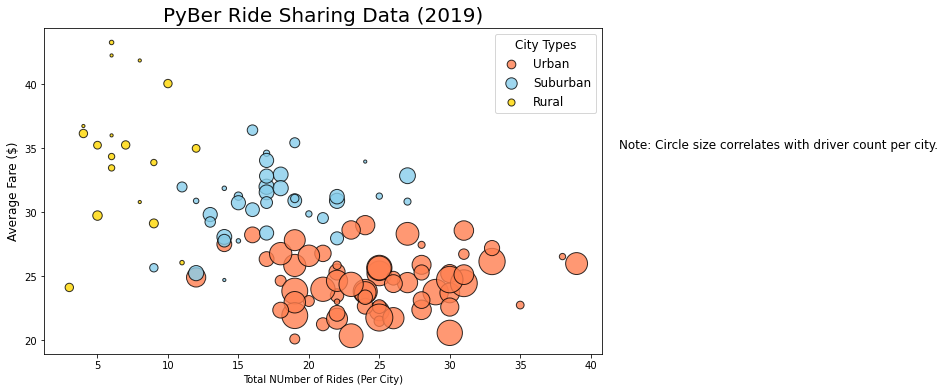

In [25]:
%%time
plt.subplots(figsize=(10, 6))
plt.scatter(count_urban_rides, avg_urban_fare, s=10*count_urban_drivers, c="coral", edgecolor="black", linewidths=1, alpha=0.8, label="Urban")
plt.scatter(count_suburban_rides, avg_suburban_fare, s=10*count_suburban_drivers, c="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")
plt.scatter(count_rural_rides, avg_rural_fare, s=10*count_rural_drivers, c="gold", edgecolor="black", linewidths=1, alpha=0.8, label="Rural")

plt.title("PyBer Ride Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total NUmber of Rides (Per City)")
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
# plt.legend()
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[0]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Save
plt.savefig("Analysis/Fig1.png")

In [26]:
# Summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [27]:
count_rural_rides.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [28]:
# Calculate the mean of the ride count for each city type
round(count_urban_rides.mean(),2), round(count_suburban_rides.mean(),2), round(count_rural_rides.mean(),2)

(24.62, 17.36, 6.94)

In [29]:
# Calculate the median of the ride count for each city type
round(count_urban_rides.median(),2), round(count_suburban_rides.median(),2), round(count_rural_rides.median(),2)

(24.0, 17.0, 6.0)

In [30]:
# Calculate the mode of the ride count for each city type
round(count_urban_rides.mode()), round(count_suburban_rides.mode()), round(count_rural_rides.mode())

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [31]:
# Import numpy and stats from SciPy
import numpy as np
import scipy.stats as sts

In [35]:
mean_urban_ride_count = np.mean(count_urban_rides)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(count_urban_rides)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(count_urban_rides)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

# Suburban rides
mean_suburban_ride_count = np.mean(count_suburban_rides)
median_suburban_ride_count = np.median(count_suburban_rides)
mode_suburban_ride_count = sts.mode(count_suburban_rides)
print(f"For suburban ride counts, the mean is {mean_suburban_ride_count}, the median is {median_suburban_ride_count} amd the mode is {mode_suburban_ride_count}")

# Rural rides
mean_rural_ride_count = np.mean(count_rural_rides)
median_rural_ride_count = np.median(count_rural_rides)
mode_rural_ride_count = sts.mode(count_rural_rides)
print(f"For rural ride counts, the mean is {mean_rural_ride_count}, the median is {median_rural_ride_count} amd the mode is {mode_rural_ride_count}")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).
For suburban ride counts, the mean is 17.36111111111111, the median is 17.0 amd the mode is ModeResult(mode=array([17], dtype=int64), count=array([7]))
For rural ride counts, the mean is 6.944444444444445, the median is 6.0 amd the mode is ModeResult(mode=array([6], dtype=int64), count=array([5]))


In [37]:
# Get fares for each city type
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

# Analysis
mean_urban_fares = np.mean(urban_fares)
median_urban_fares = np.median(urban_fares)
mode_urban_fares = sts.mode(urban_fares)

mean_suburban_fares = np.mean(suburban_fares)
median_suburban_fares = np.median(suburban_fares)
mode_suburban_fares = sts.mode(suburban_fares)

mean_rural_fares = np.mean(rural_fares)
median_rural_fares = np.median(rural_fares)
mode_rural_fares = sts.mode(rural_fares)

# Output
print(f"For urban cities, the mean of fares is {mean_urban_fares}, the median is {median_urban_fares} and the mode is {mode_urban_fares}.")
print(f"For suburban cities, the mean of fares is {mean_suburban_fares}, the median is {median_suburban_fares} and the mode is {mode_suburban_fares}.")
print(f"For rural cities, the mean of fares is {mean_rural_fares}, the median is {median_rural_fares} and the mode is {mode_rural_fares}.")


For urban cities, the mean of fares is 24.52577230769236, the median is 24.64 and the mode is ModeResult(mode=array([22.86]), count=array([5])).
For suburban cities, the mean of fares is 30.97012800000002, the median is 30.75 and the mode is ModeResult(mode=array([17.99]), count=array([3])).
For rural cities, the mean of fares is 34.623440000000016, the median is 37.05 and the mode is ModeResult(mode=array([37.05]), count=array([2])).


In [39]:
# Get drivers for each city type
urban_drivers = urban_cities_df["driver_count"]
suburban_drivers = suburban_cities_df["driver_count"]
rural_drivers = rural_cities_df["driver_count"]

# Analysis
mean_urban_drivers = np.mean(urban_drivers)
median_urban_drivers = np.median(urban_drivers)
mode_urban_drivers = sts.mode(urban_drivers)

mean_suburban_drivers = np.mean(suburban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)

mean_rural_drivers = np.mean(rural_drivers)
median_rural_drivers = np.median(rural_drivers)
mode_rural_drivers = sts.mode(rural_drivers)

# Output
print(f"For urban cities, the mean of drivers is {mean_urban_drivers}, the median is {median_urban_drivers} and the mode is {mode_urban_drivers}.")
print(f"For suburban cities, the mean of drivers is {mean_suburban_drivers}, the median is {median_suburban_drivers} and the mode is {mode_suburban_drivers}.")
print(f"For rural cities, the mean of drivers is {mean_rural_drivers}, the median is {median_rural_drivers} and the mode is {mode_rural_drivers}.")

For urban cities, the mean of drivers is 36.67815384615385, the median is 37.0 and the mode is ModeResult(mode=array([39], dtype=int64), count=array([86])).
For suburban cities, the mean of drivers is 13.712, the median is 16.0 and the mode is ModeResult(mode=array([20], dtype=int64), count=array([79])).
For rural cities, the mean of drivers is 4.296, the median is 4.0 and the mode is ModeResult(mode=array([1], dtype=int64), count=array([32])).


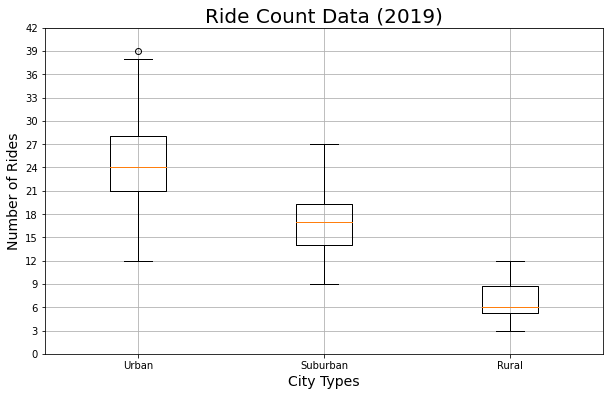

In [46]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [count_urban_rides, count_suburban_rides, count_rural_rides]
fig, ax = plt.subplots(figsize=(10,6))
# Add the title, y-axis label, data and grid.
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
plt.savefig("Analysis/Fig2.png")
plt.show()

In [47]:
# Get the outlier(s)
urban_city_outlier = count_urban_rides[count_urban_rides == 39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


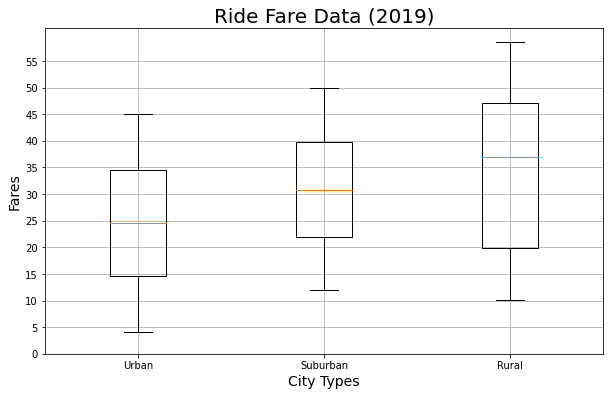

In [51]:
# Box and Whiskers for Ride Fare Data
fare_x_labels = ["Urban", "Suburban", "Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
# Add the title, y-axis label, data and grid.
ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_ylabel("Fares", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(ride_fare_data, labels=fare_x_labels)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
plt.savefig("Analysis/ride_fare_data.png")
plt.show()

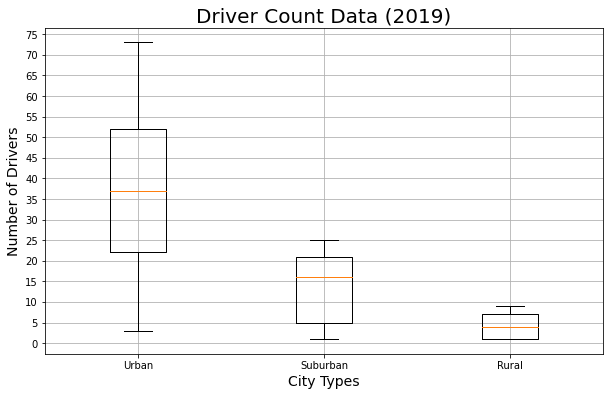

In [52]:
# Box and Whiskers for driver counts
drivers_x_labels = ["Urban", "Suburban", "Rural"]
count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10,6))
# Add title, axes, data, grid
ax.set_title("Driver Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Drivers", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.boxplot(count_data, labels=drivers_x_labels)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
plt.show()

In [53]:
# Get fare summation by city type
sum_fares_by_city_type = city_ride_merged_df.groupby(["type"]).sum()["fare"]
sum_fares_by_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [54]:
# Sum all fares
total_fares = city_ride_merged_df["fare"].sum()
total_fares

63538.64

In [55]:
# Percentage of fare for each city type
type_percents = 100 * sum_fares_by_city_type / total_fares
type_percents
# can single-line this as well

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

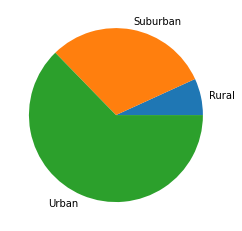

In [56]:
# Create the pie chart(s)
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"])
plt.show()

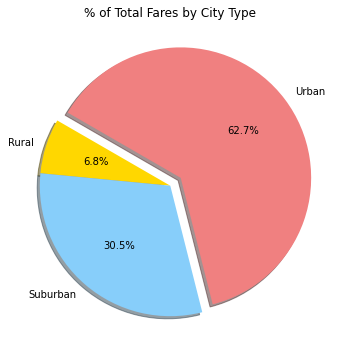

In [58]:
# Modify the pie chart
import matplotlib as mpl
plt.subplots(figsize=(10,6))
plt.pie(type_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change default font sizes
mpl.rcParams['font.size'] = 14
plt.savefig("Analysis/fares_by_city_pie.png")
plt.show()

In [61]:
# Calculate percentage of rides for each city type
ride_percents = 100 * city_ride_merged_df.groupby(["type"]).count()["ride_id"] / city_ride_merged_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

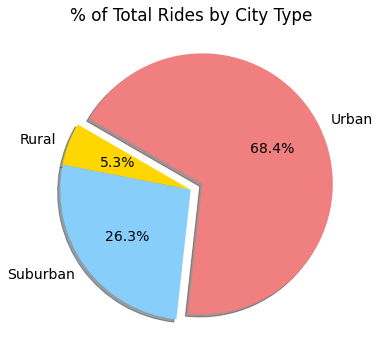

In [62]:
# Modify the pie chart
import matplotlib as mpl
plt.subplots(figsize=(10,6))
plt.pie(ride_percents,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change default font sizes
mpl.rcParams['font.size'] = 14
plt.savefig("Analysis/rides_by_city_pie.png")
plt.show()

In [64]:
# Calculate percentage of drivers for each city type
drivers_percent = (city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()) * 100
drivers_percent

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

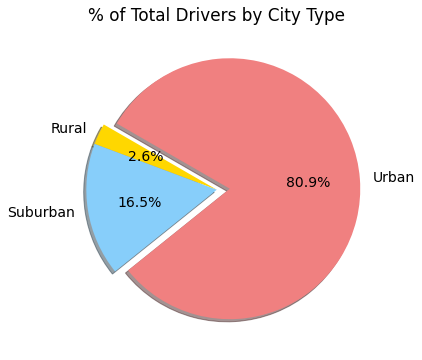

In [66]:
# Modify the pie chart
import matplotlib as mpl
plt.subplots(figsize=(10,6))
plt.pie(drivers_percent,
        labels=["Rural", "Suburban", "Urban"],
        colors=["gold", "lightskyblue", "lightcoral"],
        explode=[0, 0, 0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")
# Change default font sizes
mpl.rcParams['font.size'] = 14
plt.savefig("Analysis/Fig7_drivers_by_city_pie.png")
plt.show()